Importing Libraries

In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

Reading the Dataset

In [100]:
data=pd.read_csv('Advertising.csv')

In [101]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [102]:
data.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [103]:
data.describe()


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Removing useless column

In [104]:
data =data.drop(columns=["Unnamed: 0"])


In [105]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

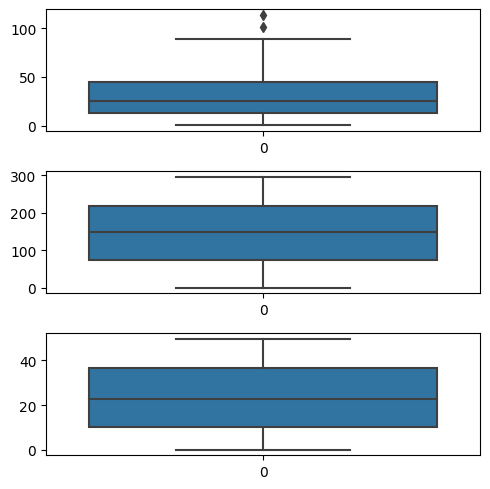

In [106]:
fig , axs = plt.subplots(3, figsize=(5,5))
plt1= sb.boxplot(data['Newspaper'] , ax=axs[0])
plt2= sb.boxplot(data['TV'] , ax=axs[1])
plt3= sb.boxplot(data['Radio'] , ax=axs[2])
plt.tight_layout()

<ipython-input-107-85384a40a210>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

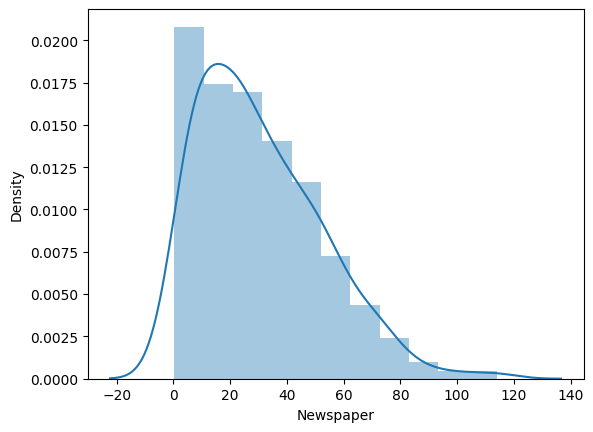

In [107]:
sb.distplot(data['Newspaper'])

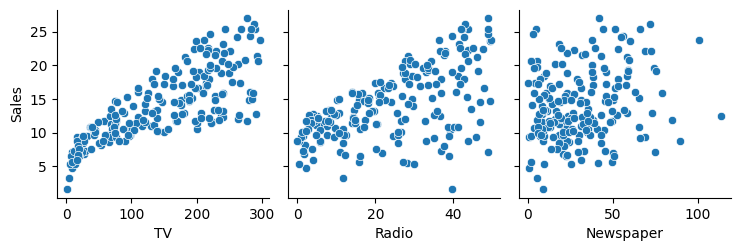

In [108]:
sb.pairplot(data , x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'])

<Axes: >

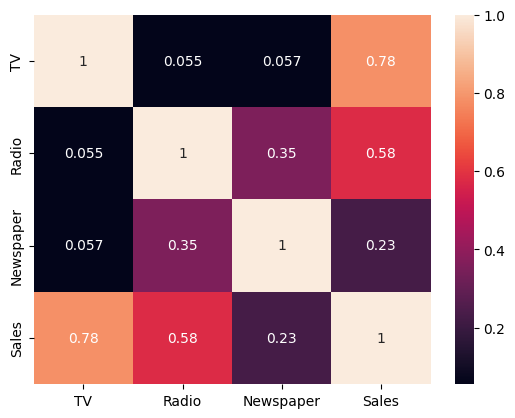

In [109]:
sb.heatmap(data.corr(), annot= True)

Spliting

In [110]:
x=data.iloc[:, 0:-1]

In [111]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [112]:
y=data.iloc[:,-1]

In [113]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

Training and Testing

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [115]:
x_test.head()

,TV,Radio,Newspaper
56,7.3,28.1,41.4
37,74.7,49.4,45.7
67,139.3,14.5,10.2
79,116.0,7.7,23.1
80,76.4,26.7,22.3


In [116]:
x_train

,TV,Radio,Newspaper
71,109.8,14.3,31.7
90,134.3,4.9,9.3
100,222.4,4.3,49.8
44,25.1,25.7,43.3
94,107.4,14.0,10.9
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


In [117]:
y_train.head()

71     12.4
90     11.2
100    11.7
44      8.5
94     11.5
Name: Sales, dtype: float64

In [118]:
y_test.head()

56     5.5
37    14.7
67    13.4
79    11.0
80    11.8
Name: Sales, dtype: float64

In [119]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

Applying Linear Regression

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
LR=LinearRegression()

In [122]:
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [123]:
y_pred=LR.predict(x_test_scaled)

In [124]:
from sklearn.metrics import r2_score

In [125]:
r2_score(y_test,y_pred)*100

91.91593340046745

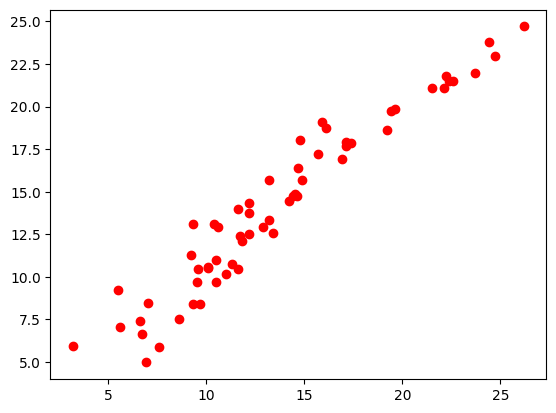

In [126]:
plt.scatter(y_test,y_pred,c='r')